# September Puzzle Solution 2024

## Question 1

A hot Mongolian folk band is playing tonight. The venue is a coffee house in the middle of a street that has 11 parking spots, as shown above. Each spot is open with probability p = 1/20.
If you approach from the right end of the street, what is the probability that the first open spot you encounter is zero or 1 spots away from the venue?

Let:

  $X$ - radom variabe, distance from from the venue, $X \geq 0$
  
  $p = 1/2 = 0.05$    - probaility that the spot is open
  
  $q = 1 - p = 0.95$  - probaility that the spot is closed

The spot is 1 or zero spots away from the venue while moving from the right to left means eigher:
1) right spots #5, 4, 3, 2 closed and #1 is open or
2) right spots #5, 4, 3, 2, 1 closed and #0 is open or
2) right spots #5, 4, 3, 2, 1 closed and #0 closed and left #1 opend

This means:

$$
   \mathrm{P} (X\leqslant 1) = pq^4 + pq^5 + pq^6 = 0.116
$$


## Question 2

The Mongolians are back and more popular than ever. They’re playing a bigger venue this time, and you want to park as close to the show as possible. The venue is in the middle of a very long one-way street—so you can’t return to a parking spot once you pass it. You also can’t see if a spot is open or not until you’re next to it and, as before, each spot is open with probability p = 1/20.
On average, how close can you park to the venue if you park optimally?

Apply the approach from Task 1 while moving from the right to the venue starting at spot $x$. Then the pobaility that the spot is at position $i$ right to the spot (and inclusive) is $pq^{x-i}$. The probality that we passed the vanue and did no find any spot is $q^{x + 1}$. After the vanue passed we need to move until the fisrt free spot, thus in avarage we will need $1/p$ moves. Everage distance is an expactation of $X$ which includes both cases: the spot found form the right and inluding the vanue or left from the venue:

$$
\left\langle D(x) \right\rangle = p\sum_{i=0}^{x}iq^{x-i}+\frac{1}{p}q^{x+1}
$$

Let us approximate the discrete expression for the average distance with the continuous function instead:

$$
\left\langle D(x) \right\rangle = p\int_{0}^{x}tq^{x-t}dt + \frac{1}{p}q^{x+1}
$$

Then we may find optimal solutuin as the minum $\left\langle D(x) \right\rangle$ as $d\left\langle D(x) \right\rangle/dx = 0$:

$$
\frac{d}{dx}\left\langle D(x) \right\rangle = p\frac{d}{dx}\int_{0}^{x}tq^{x-t}dt + \frac{1}{p}\frac{d}{dx}q^{x+1} = 0
$$

$$
\Rightarrow  px + \frac{\mathrm{ln}p}{p}q^{x+1} = 0
$$



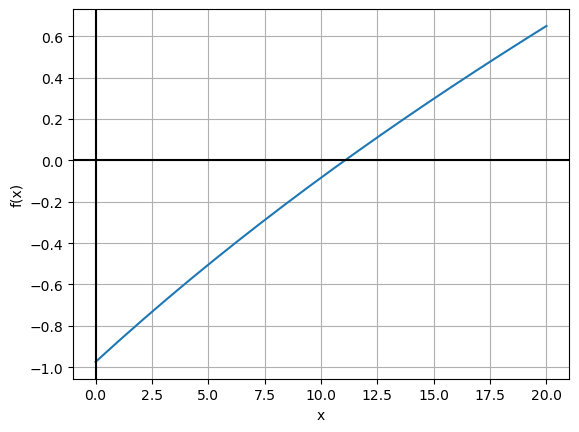

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

p = 1/20
q = 1 - p

f = lambda x : p*x + (np.log(q)/p)*q**(x + 1)

x = np.linspace(0., 20., 20)

plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

We can see, that the solution is between 10 and 12.5:

In [30]:
x_initial_guess = 10.
x_solution = fsolve(f, x)

print(f'Average optinal distance from the vanue : {x_solution[0]:.f}')

Average optinal distance from the vanue : 11.06
